## Importing Required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [3]:
df=pd.read_excel('RetailPulseAssignmentData.xlsx')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Performing EDA

In [6]:
#Making new column of Month of sales
df["Month"]=df.InvoiceDate.dt.month_name()

In [7]:
#Making new column of Year of sales
df["Year"]=df.InvoiceDate.dt.year

We saw that some values are negative in price & quantity
So coverting it into absolute value

In [8]:
df.Quantity=df.Quantity.abs()
df.Price=df.Price.abs()

Here we saw that some values in Price cloumn is 0. So considerind it as a free product or damage product by seller.
We can also replace this values by mean of Price cloumn.

In [9]:
#Adding New column of Total Amount of product selled
df["TotalAmount"]=df.Quantity * df.Price

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,December,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,December,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,December,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,December,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,December,2009,30.0


In [11]:
#Creating new Dataframe so we can work on that without changing the orignal one
data=df[["Customer ID","StockCode","Quantity","Price","TotalAmount","Month","Year","Country"]]

In [12]:
data.head()

,Customer ID,StockCode,Quantity,Price,TotalAmount,Month,Year,Country
0,13085.0,85048,12,6.95,83.4,December,2009,United Kingdom
1,13085.0,79323P,12,6.75,81.0,December,2009,United Kingdom
2,13085.0,79323W,12,6.75,81.0,December,2009,United Kingdom
3,13085.0,22041,48,2.10,100.8,December,2009,United Kingdom
4,13085.0,21232,24,1.25,30.0,December,2009,United Kingdom


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer ID  417534 non-null  float64
 1   StockCode    525461 non-null  object 
 2   Quantity     525461 non-null  int64  
 3   Price        525461 non-null  float64
 4   TotalAmount  525461 non-null  float64
 5   Month        525461 non-null  object 
 6   Year         525461 non-null  int64  
 7   Country      525461 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 32.1+ MB


In [14]:
data.isnull().sum()

Customer ID    107927
StockCode           0
Quantity            0
Price               0
TotalAmount         0
Month               0
Year                0
Country             0
dtype: int64

We can see that their is null values in Customer ID column.

### Filling missing values in Customer ID

In [19]:
data["Customer ID"].isna().sum()/data.shape[0]

0.20539488182757618

Their is 20.53% missingt values in Customer ID.

In [20]:
#Filling missing value in Customer field with just above value of customer ID
data["Customer ID"].fillna(method='pad',inplace=True)

C:\Users\samee\AppData\Local\Temp\ipykernel_19644\1786268312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer ID"].fillna(method='pad',inplace=True)


In [21]:
data.isnull().sum()

Customer ID    0
StockCode      0
Quantity       0
Price          0
TotalAmount    0
Month          0
Year           0
Country        0
dtype: int64

Now we can see that their is no missing values in your dataset.

### Country Vs Sale Amount

In [22]:
data.Country.value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

#### From this we can conclude:-
 - This Kirana Store sells product accross many countries(almost 40).
 - Most of the product is selled at United Kingdom
 - Minimum product is selled to Leabanon

In [50]:
country_sales=data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
country_sales

Country
United Kingdom          9497480.993
EIRE                     409712.910
Netherlands              273708.590
Germany                  208500.291
France                   163653.080
Spain                     58117.940
Sweden                    55837.270
Denmark                   54840.750
Switzerland               44499.370
Norway                    43808.790
Australia                 32841.800
Channel Islands           27725.320
Belgium                   26450.630
Portugal                  24769.320
Italy                     16345.520
Greece                    14386.370
Austria                   13805.380
Hong Kong                 12482.780
Cyprus                    11563.050
Japan                     11008.080
United Arab Emirates      10344.330
Malta                      8060.250
Finland                    7571.210
Unspecified                7434.910
RSA                        5237.300
USA                        5017.320
Lithuania                  4892.680
Singapore           

<AxesSubplot:xlabel='Country'>

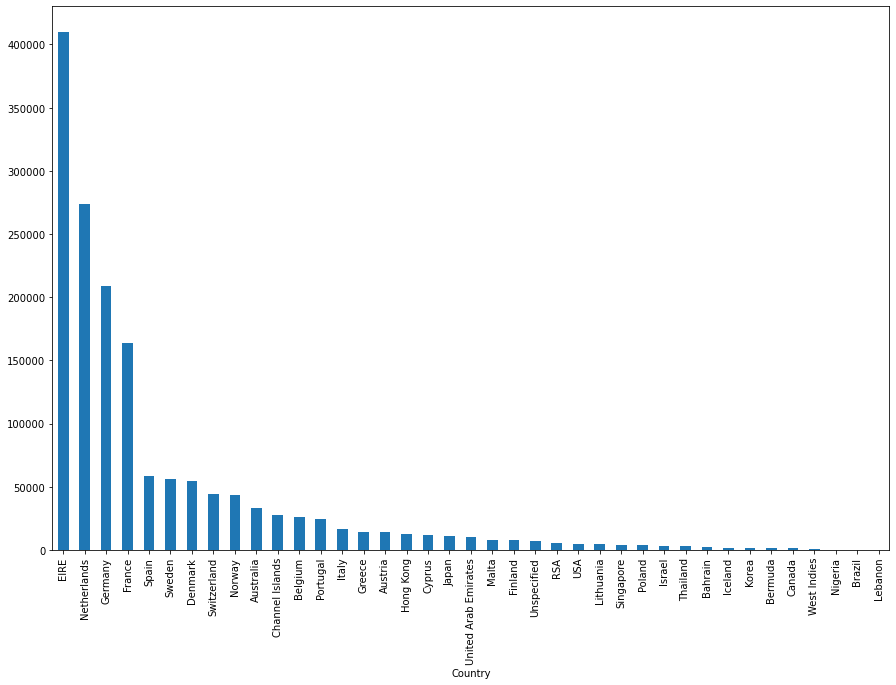

In [56]:
#Plotting Graph and removing UK as we know it has Highest Sales
country_sales.iloc[1:].plot(kind = 'bar',figsize=(15, 10))

#### From above graph we can conclude that:-
 - Highest Sale is in United Kingdom
 - Lowest Sale is in Lebanon
 - Top countries with highest sales are United Kingdom, EIRA, Netherlands, Germany & France
 - Countries with Least sales are West Indies, Bermuda, Nigeria & Lebanon

## Country Vs Number of Customer

In [70]:
country_id=data.groupby('Country')['Customer ID'].size().sort_values(ascending=False)


In [71]:
country_id

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Thailand                    76
Hong Kong                   76


<AxesSubplot:xlabel='Country'>

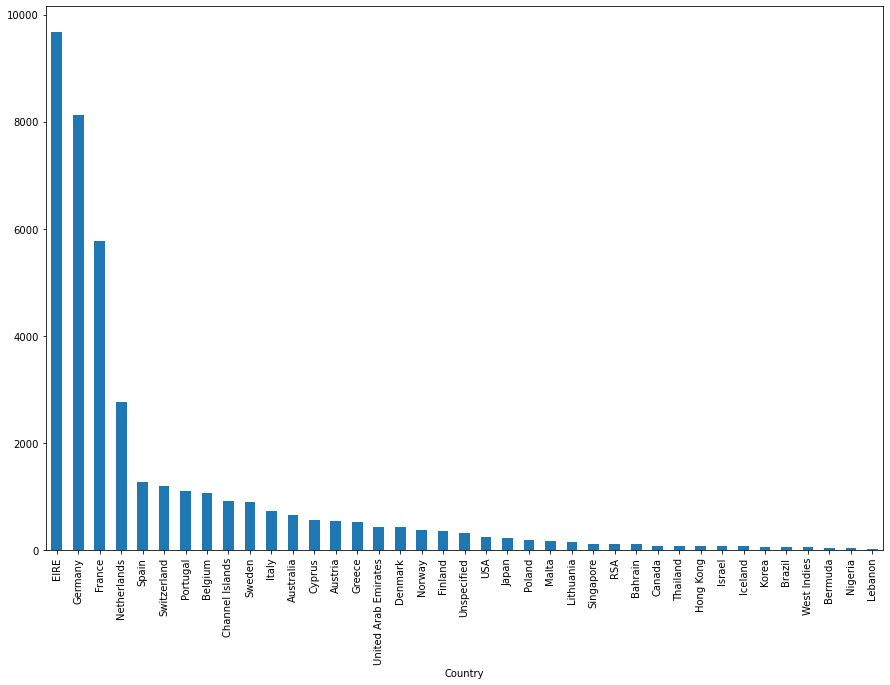

In [72]:
country_id.iloc[1:].plot(kind = 'bar',figsize=(15, 10))

#### From above we see that:-
 - United Kingdom has highest number of customers followed by EIRA, Germany & France
 - Lebanon has least number of customers

### Customer ID vs Sale Amount

In [26]:
#Checking Unique customers
len(data['Customer ID'].unique())

4383

In [27]:
customer_totalamount=data.groupby("Customer ID")["TotalAmount"].sum().sort_values(ascending=False)
customer_totalamount

Customer ID
18102.0    409331.93
14646.0    256289.61
14156.0    224777.65
14911.0    180442.16
13694.0    140328.81
             ...    
14914.0         5.85
16580.0         5.00
13788.0         3.75
16995.0         1.25
14827.0         0.00
Name: TotalAmount, Length: 4383, dtype: float64

<AxesSubplot:xlabel='Customer ID'>

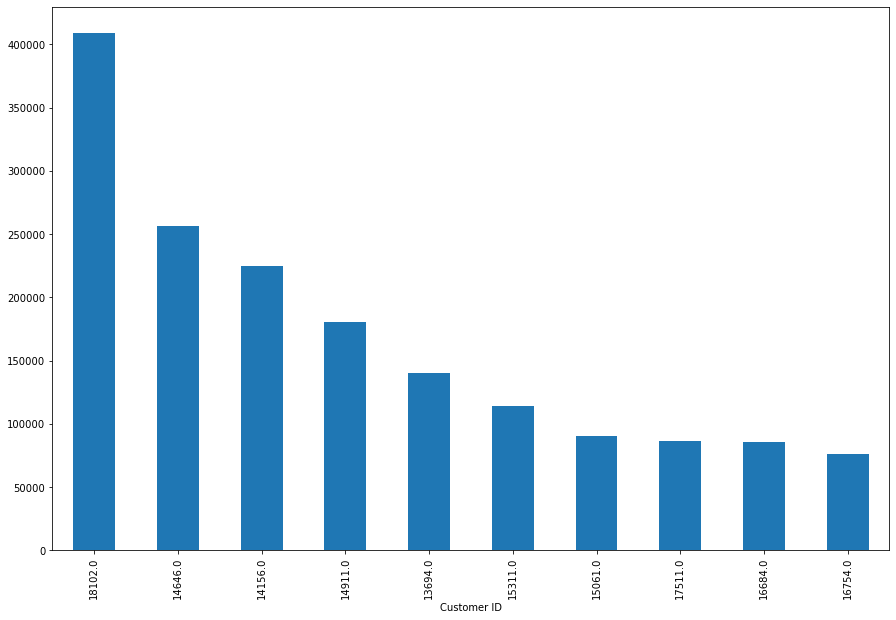

In [28]:
customer_totalamount.iloc[:10].plot(kind = 'bar',figsize=(15, 10))

#### Here is a graph of top 10 customer with highest purchases
 - Customer with ID 18102 purchased product of maximum amount alone.

<AxesSubplot:xlabel='Customer ID'>

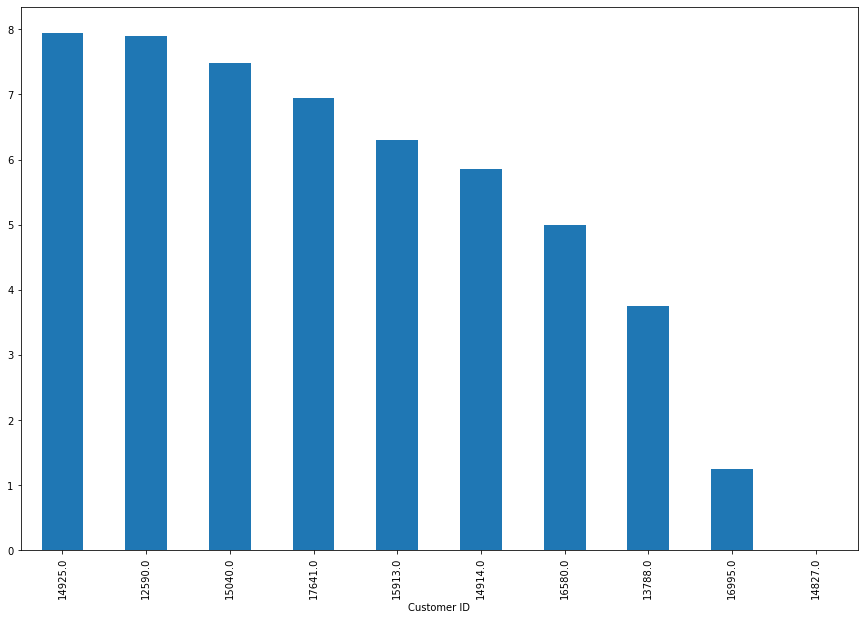

In [29]:
customer_totalamount.iloc[-10:].plot(kind = 'bar',figsize=(15, 10))

#### Here is a graph of top 10 customer with highest purchases
 - Customer with ID 14827 had Zero purchased.

### Month vs Customer

In [30]:
cos_month=data.groupby("Month")["Customer ID"].count().sort_values(ascending=False)
cos_month

Month
November     78015
December     67751
October      59098
September    42091
March        41511
June         39983
May          35323
April        34057
July         33383
August       33306
January      31555
February     29388
Name: Customer ID, dtype: int64

<AxesSubplot:xlabel='Month'>

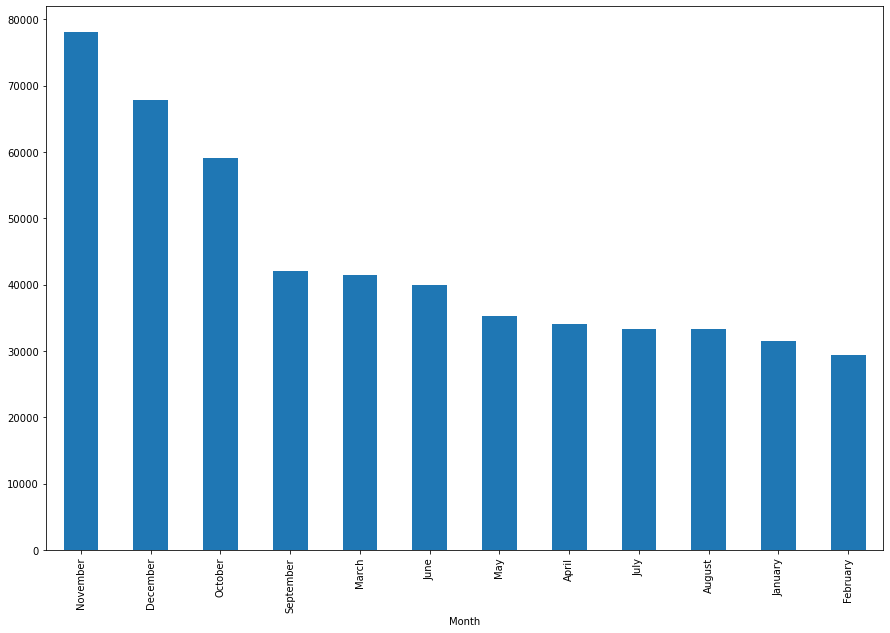

In [31]:
#Plotting Graph
cos_month.plot(kind = 'bar',figsize=(15, 10))

#### We can see that:-
 - At month of November highest number of customers had purchased products followed by December
 - Month of february had witnessed lowest number of customer 

### Sales, Month wise

In [32]:
#Year 2009 has only one month data of december.
data.TotalAmount[data["Year"]==2009].sum()

851524.4099999999

#### Total sales in 2009 is 851524.4099

In [33]:
data.TotalAmount[data["Year"]==2010].sum()

10221522.144000001

#### Total sales in 2010 is 10221522.144

In [34]:
sales_2010=data[data['Year'] == 2010]


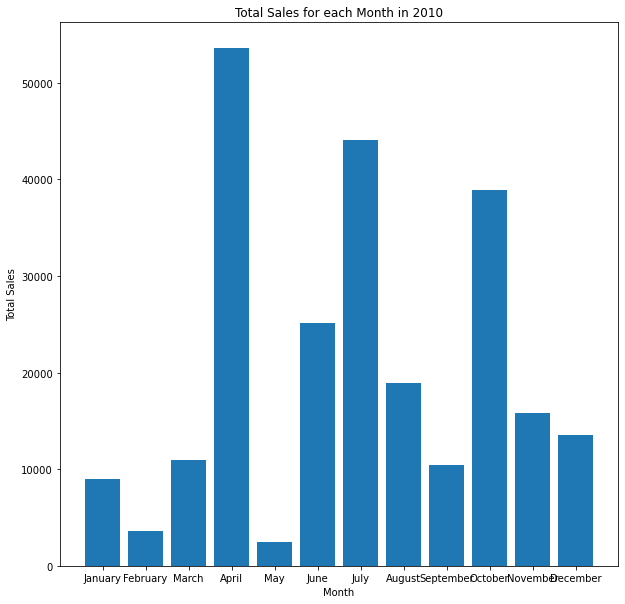

In [49]:
plt.figure(figsize=(10,10))
plt.bar(sales_2010['Month'], sales_2010['TotalAmount'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales for each Month in 2010')
plt.show()

#### From graph it is clear that in year 2010:-
 - April has highest sale followed by June & October
 - May has lowest sale

### Product vs Quantity Purchased

In [36]:
# Checking total number of products
len(data.StockCode.unique())

4632

#### We can see that total products available in shop is 4632

In [37]:
stock_country=data.groupby("StockCode")["Quantity"].count().sort_values()
stock_country

StockCode
47285B       1
21021        1
21020        1
21019        1
21487        1
          ... 
21232     1843
21212     1933
85099B    2057
22423     2221
85123A    3516
Name: Quantity, Length: 4632, dtype: int64

In [38]:
stock_country.iloc[434]

1

In [39]:
stock_country.iloc[435]

2

#### Products till index number 434 is shipped only in one country.

In [75]:
stock_country.iloc[-10:]

StockCode
20914     1276
21754     1386
84991     1400
84879     1458
20725     1620
21232     1843
21212     1933
85099B    2057
22423     2221
85123A    3516
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='StockCode'>

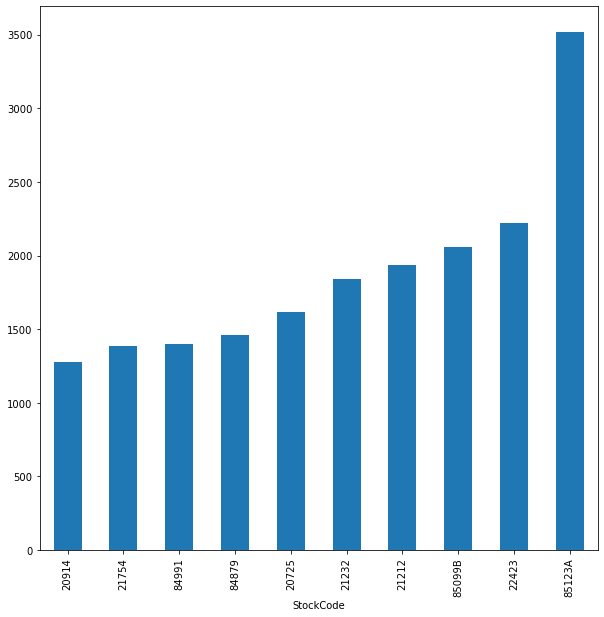

In [78]:
# Graph of top 10 most famous product
stock_country.iloc[-10:].plot(kind='bar',figsize=(10,10))

#### We can conclude that:-
 - Product with Stock code 85123A had shipped in most countries

### Relation between seller and customer

In [81]:
seller_customer=data["Customer ID"].value_counts().sort_values()
seller_customer

13452.0       1
13378.0       1
14845.0       1
13222.0       1
14613.0       1
           ... 
12748.0    3146
14156.0    3304
14606.0    5020
17841.0    6148
14911.0    6801
Name: Customer ID, Length: 4383, dtype: int64

<AxesSubplot:>

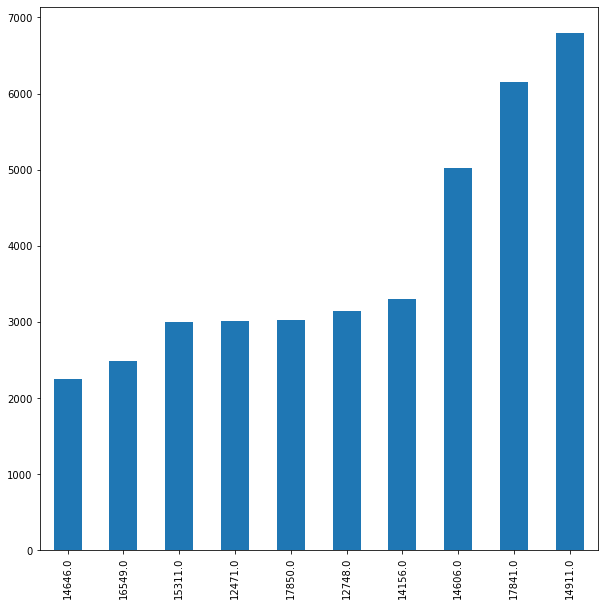

In [80]:
#Graph of top 10 customer who visited the shop most
seller_customer.iloc[-10:].plot(kind='bar',figsize=(10,10))

#### This shows that:-
 - Customer with ID 14911 had visited the shop most among others.
 - Also there are some customer who had visited shop only onces.

### Product vs Total Sales

In [42]:
stock_sales=data.groupby("StockCode")["TotalAmount"].sum().sort_values()
stock_sales

StockCode
37445D         0.00
90109          0.00
90110          0.00
90117          0.00
90172          0.00
            ...    
DOT       116415.43
B         136552.02
85123A    161356.22
22423     177105.56
M         540081.29
Name: TotalAmount, Length: 4632, dtype: float64

<AxesSubplot:xlabel='StockCode'>

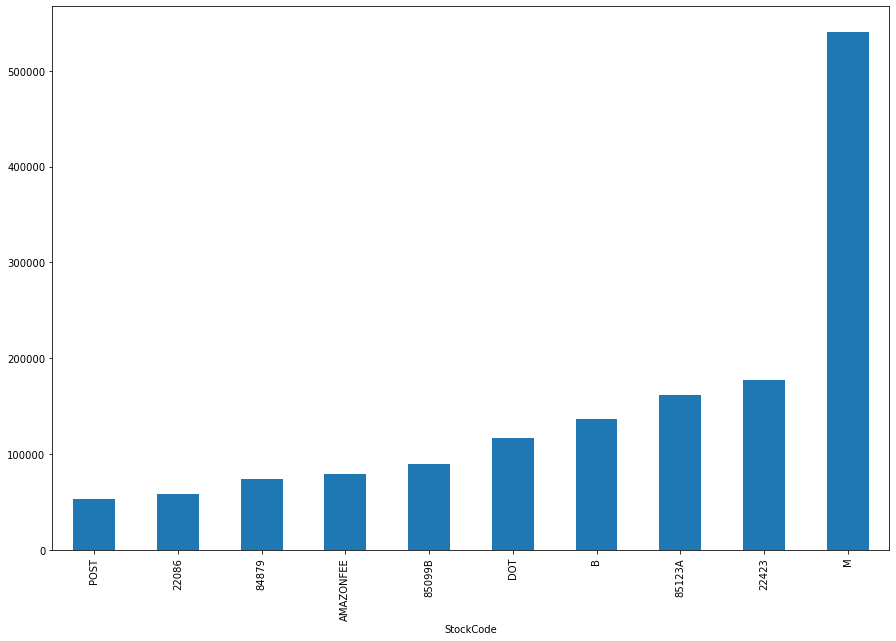

In [43]:
#Graph of top 10 product which have highest sales
stock_sales.iloc[-10:].plot(kind='bar',figsize=(15,10))

#### From graph we can conclude that:-
 - Product with stock code M has highest amount of scale among others followed by stock code 22423, 85123A.
 - Some products had zero sale.



### Product demand Vs Month

In [44]:
demand=data.groupby("StockCode")["Month"].value_counts()
demand

StockCode     Month   
10002         December    40
              November    39
              June        38
              May         38
              July        26
                          ..
gift_0001_90  August       1
              January      1
m             February     2
              April        1
              June         1
Name: Month, Length: 34936, dtype: int64

In [83]:
#Coverting list into series and then into data frame
demand_series = pd.Series(demand)
df_demand=demand_series.to_frame(name="Count")

In [46]:
df_demand

Count
StockCode    Month          
10002        December     40
             November     39
             June         38
             May          38
             July         26
...                      ...
gift_0001_90 August        1
             January       1
m            February      2
             April         1
             June          1

[34936 rows x 1 columns]

#### Here we can see that which product is in how much demand and at what month.

In [47]:
df_demand.Count.max()

445

In [82]:
df_demand.Count.min()

1

In [48]:
df_demand[df_demand["Count"]==445]

,,Count
StockCode,Month,
85123A,December,445


#### Product having Sock code-85123A  is most demanded product

<br>

## Some business insights

 - Their are only 4383 customers who are purchasing products and since thier are 525461 datapoint in our dataset which implies that customers are repeating at a frequent rate.
 - Customer ID-18102, 14646, 14911, 14156, 13694, 15311, 15061, 17511, 16684, 16754 are valuable customer and shop keeper should try o make better relation with this customers as their purchases are of high amounts.
 - November had witnessed highest number of customers but still highest purchases occured at month of April. As in April only 34057 customers had arrived in shop but purchases made by them is high as compare to customers arrived in month of november.
 - Product having stock code-85123A is among most famous product across all countries. Shop must contain or refill this product stock time to time.
 - Customer with ID-14911 is most a loyal customer as it has visited most of the time in shop though highest amount of purchased is made by customer having ID-18102.
 - Product having stock code- M had highest amount of sale, aslo product having stock code-85123A is the second most highest product with highest sale which implies that "Product having stock code-85123A is a hero product of the shop".
 - Customer can be segmented into different catagories according to the countries as most of the customers belongs to UK, EIRA, Germany & France 